In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import math
import matplotlib.pyplot as plt

In [4]:
image = Image.open('./256.bmp')

In [5]:
A = np.array(image)

In [26]:
A.shape

(1440, 1080)

In [163]:
A@A.T == (A@A.T).T

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [153]:
A1 = A[:1080,:]

In [155]:
A1.shape

(1080, 1080)

In [157]:
la_a1,u_ai = np.linalg.eig(A1)

In [158]:
u_ai

array([[-0.04222795+0.j        , -0.01639985+0.j        ,
         0.02815999+0.j        , ..., -0.02971369+0.02044702j,
        -0.05701808-0.00577477j, -0.05701808+0.00577477j],
       [-0.0422273 +0.j        , -0.01636532+0.j        ,
         0.02795027+0.j        , ...,  0.02708011-0.03672191j,
         0.07114237+0.00474685j,  0.07114237-0.00474685j],
       [-0.0422273 +0.j        , -0.01636532+0.j        ,
         0.02795027+0.j        , ..., -0.01915452-0.00255642j,
        -0.03675961+0.00424193j, -0.03675961-0.00424193j],
       ...,
       [-0.02251618+0.j        ,  0.00751876+0.j        ,
        -0.05024663+0.j        , ...,  0.00041611-0.00784478j,
        -0.00146584+0.00417114j, -0.00146584-0.00417114j],
       [-0.02248324+0.j        ,  0.00823639+0.j        ,
        -0.04904351+0.j        , ...,  0.00080925-0.00293053j,
        -0.00032882+0.00449607j, -0.00032882-0.00449607j],
       [-0.02244674+0.j        ,  0.00907768+0.j        ,
        -0.04679644+0.j       

# 猜测不正确的原因就是不能简单对负数的绝对值开方。
 - 为什么特征向量是一个复数的矩阵

In [12]:
def svd(A):
    """
        svd矩阵分解
        Arg:
            A : (narray) :原始矩阵
        Return:
            p : (narray) :左奇异矩阵的特征向量
            s : (list) : 特征值
            q : (narray):右奇异矩阵的特征向量
    """
    P = A@A.T
    Q = A.T@A
#     print('------P------')
    print(P)
#     print('------Q------')
    print(Q)
    la_p,p = np.linalg.eig(P)
#     print('-------p--------')
#     print(p)
    la_q,q = np.linalg.eig(Q)
    print('-------q--------')
    print(Q)
    print('-------la_q--------')
    print(la_q)
    m,n = A.shape
#     if m > n:
#         s =[for i in la_p math.sqrt(i) if i >= 0 else -math.sqrt(-i)]
    s = list(map(lambda i : math.sqrt(i) if i >= 0 else -math.sqrt(-i),la_p))
#     else :
#         s =[for i in la_q math.sqrt(i) if i >= 0 else -math.sqrt(-i)]
#         s = list(map(lambda i : math.sqrt(i) if i >= 0 else -math.sqrt(-i),la_q))
        
#     s.sort(reverse = True)
    return p,s[:min(m,n)],q

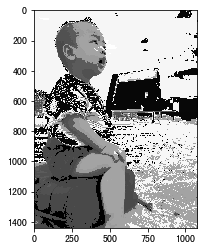

In [160]:
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [13]:
p,s,q = svd(A)

[[ 68   0   0 ...  18 164 112]
 [  0  68  68 ...  18 206 154]
 [  0  68  68 ...  18 206 154]
 ...
 [ 18  18  18 ...  86 110 112]
 [164 206 206 ... 110 221 171]
 [112 154 154 ... 112 171 157]]
[[ 38 110 132 ...  20 213  65]
 [110 108 131 ...  83 157 218]
 [132 131  60 ... 137 156  48]
 ...
 [ 20  83 137 ...  64 113 203]
 [213 157 156 ... 113 150  23]
 [ 65 218  48 ... 203  23 254]]
-------q--------
[[ 38 110 132 ...  20 213  65]
 [110 108 131 ...  83 157 218]
 [132 131  60 ... 137 156  48]
 ...
 [ 20  83 137 ...  64 113 203]
 [213 157 156 ... 113 150  23]
 [ 65 218  48 ... 203  23 254]]
-------la_q--------
[ 1.37791911e+05 -4.82385242e+03 -4.76391314e+03 ...  2.30447326e+00
  1.04359288e+02  1.12524468e+02]


/Users/caoyongjun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


In [38]:
p

array([[ 2.63208003e-02+0.00000000e+00j,  3.43717156e-03+0.00000000e+00j,
         4.40298949e-02+0.00000000e+00j, ...,
        -3.36102833e-15-1.40559241e-15j,  1.90148530e-15+2.15037896e-15j,
         1.90148530e-15-2.15037896e-15j],
       [ 2.63162334e-02+0.00000000e+00j, -1.20459370e-02+0.00000000e+00j,
         6.44677402e-02+0.00000000e+00j, ...,
        -1.22657303e-01+1.98719506e-02j,  1.52677027e-02+6.17534315e-02j,
         1.52677027e-02-6.17534315e-02j],
       [ 2.63162334e-02+0.00000000e+00j, -1.20459370e-02+0.00000000e+00j,
         6.44677402e-02+0.00000000e+00j, ...,
         1.22657303e-01-1.98719506e-02j, -1.52677027e-02-6.17534315e-02j,
        -1.52677027e-02+6.17534315e-02j],
       ...,
       [ 2.58426932e-02+0.00000000e+00j, -1.44891730e-03+0.00000000e+00j,
         1.39359023e-02+0.00000000e+00j, ...,
         5.50275825e-15+2.02559620e-15j,  7.30484157e-16+4.57972754e-15j,
         7.30484157e-16-4.57972754e-15j],
       [ 2.67235590e-02+0.00000000e+00j,  1.

In [135]:
s[:10]

[302.39887198536724,
 -61.92030428559149,
 60.974731615466354,
 -59.111209656639446,
 58.523827521724726,
 -56.730000565396075,
 55.656316265292475,
 -54.67962165917095,
 54.07688886787372,
 53.66124780015806]

In [141]:
p

array([[ 2.63208003e-02+0.00000000e+00j,  3.43717156e-03+0.00000000e+00j,
         4.40298949e-02+0.00000000e+00j, ...,
        -3.36102833e-15-1.40559241e-15j,  1.90148530e-15+2.15037896e-15j,
         1.90148530e-15-2.15037896e-15j],
       [ 2.63162334e-02+0.00000000e+00j, -1.20459370e-02+0.00000000e+00j,
         6.44677402e-02+0.00000000e+00j, ...,
        -1.22657303e-01+1.98719506e-02j,  1.52677027e-02+6.17534315e-02j,
         1.52677027e-02-6.17534315e-02j],
       [ 2.63162334e-02+0.00000000e+00j, -1.20459370e-02+0.00000000e+00j,
         6.44677402e-02+0.00000000e+00j, ...,
         1.22657303e-01-1.98719506e-02j, -1.52677027e-02-6.17534315e-02j,
        -1.52677027e-02+6.17534315e-02j],
       ...,
       [ 2.58426932e-02+0.00000000e+00j, -1.44891730e-03+0.00000000e+00j,
         1.39359023e-02+0.00000000e+00j, ...,
         5.50275825e-15+2.02559620e-15j,  7.30484157e-16+4.57972754e-15j,
         7.30484157e-16-4.57972754e-15j],
       [ 2.67235590e-02+0.00000000e+00j,  1.

In [130]:
q

array([[ 0.03068106, -0.00519375, -0.03082028, ..., -0.00434868,
         0.00198921,  0.00129048],
       [ 0.02994386, -0.00990833,  0.00614411, ..., -0.01060553,
         0.01191811,  0.01892556],
       [ 0.03060866, -0.04498836,  0.00845396, ..., -0.01827694,
        -0.03991941, -0.00662827],
       ...,
       [ 0.03026147,  0.00682214, -0.01209613, ...,  0.04589099,
        -0.02125043, -0.00698305],
       [ 0.0302949 ,  0.0164023 ,  0.02215298, ...,  0.00177903,
        -0.07734491, -0.01073988],
       [ 0.03002394, -0.02674518, -0.0159132 , ...,  0.0133942 ,
        -0.02919349,  0.00790741]])

In [14]:
from scipy.linalg import svd

In [15]:
p1,s1,q1 =  svd(A)

In [16]:
s1[:10]

array([208047.64 ,  40306.57 ,  34294.867,  21443.7  ,  17604.799,
        16100.968,  13868.331,  12646.615,  11998.745,  11475.278],
      dtype=float32)

In [18]:
q1

array([[-0.03041045, -0.03045529, -0.02999035, ..., -0.03306166,
        -0.03303069, -0.03218987],
       [ 0.04835856,  0.04823644,  0.04946011, ..., -0.02602331,
        -0.02643638, -0.02763751],
       [ 0.00631495,  0.00701827,  0.00843114, ..., -0.05158348,
        -0.05151862, -0.05232237],
       ...,
       [ 0.00503933,  0.00406486, -0.01878905, ..., -0.03089583,
         0.04950679, -0.01710176],
       [-0.01007137, -0.02390986,  0.03947496, ..., -0.00969231,
        -0.00875247,  0.00541676],
       [ 0.011048  ,  0.01719886, -0.021029  , ..., -0.02350067,
         0.00411311,  0.01009121]], dtype=float32)

In [69]:
s1.shape

(1080,)

In [114]:
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(p.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(p.shape[0])
    # 用新的s_temp，以及p,q重构A
    s = s[:,:q.shape[0]]
    print(p.shape)
    print(s.shape)
    temp = p@s
    temp = temp@q
    print(temp)
#     temp.astype(int)
    plt.imshow(temp.astype(int), cmap=plt.cm.gray, interpolation='nearest')
    plt.show()

(1440, 1440)
(1440, 1080)
[[-0.29695411+0.j -1.00597311+0.j -0.17329115+0.j ... -0.45828658+0.j
   0.23364552+0.j -0.02841123+0.j]
 [-0.43445231+0.j -0.76219084+0.j -0.24516186+0.j ... -0.43518525+0.j
  -0.27964476+0.j  0.13212188+0.j]
 [-0.43445231+0.j -0.76219084+0.j -0.24516186+0.j ... -0.43518525+0.j
  -0.27964476+0.j  0.13212188+0.j]
 ...
 [ 0.59405796+0.j  0.31683749+0.j -0.19330249+0.j ... -0.49653585+0.j
   0.23401778+0.j  0.31199542+0.j]
 [ 0.60639836+0.j -0.36964125+0.j -0.77751471+0.j ...  0.30583523+0.j
   0.05775704+0.j  0.43627947+0.j]
 [ 0.57358807+0.j -0.01296203+0.j -0.15978546+0.j ... -0.05366653+0.j
  -0.23614895+0.j  0.27565448+0.j]]


/Users/caoyongjun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


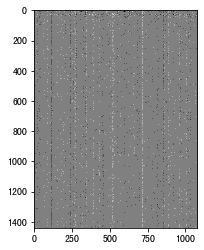

In [115]:
get_image_feature(np.array(s),50)

In [82]:
p1.shape

(1440, 1440)

In [83]:
q1.shape

(1080, 1080)

In [145]:
def get_image_feature(s, k):
    # 对于S，只保留前K个特征值
    s_temp = np.zeros(p1.shape[0])
    s_temp[0:k] = s[0:k]
    s = s_temp * np.identity(p1.shape[0])
    # 用新的s_temp，以及p,q重构A
    s = s[:,:q1.shape[0]]
    print(p1.shape)
    print(s.shape)
    temp = p1@s
    temp = temp@q1
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()

(1440, 1440)
(1440, 1080)


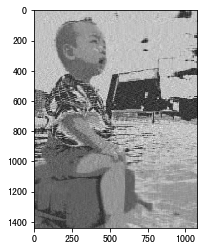

In [111]:
get_image_feature(s1,50)

In [112]:
s1.shape

(1080,)

(1440, 1440)
(1440, 1080)


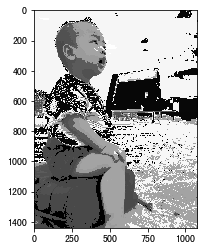

In [113]:
get_image_feature(s1,s1.shape[0])

In [142]:
def get_k(pre):
    return int(1440*1080*pre/(1440+1080+1))

# 1%的图像 

(1440, 1440)
(1440, 1080)


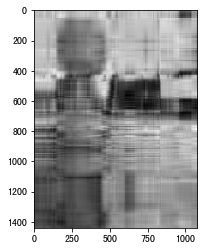

In [146]:
get_image_feature(s1,get_k(0.01))

# 10% 的图像

(1440, 1440)
(1440, 1080)


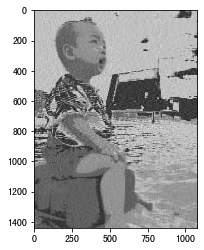

In [147]:
get_image_feature(s1,get_k(0.1))

# 50%的图像

(1440, 1440)
(1440, 1080)


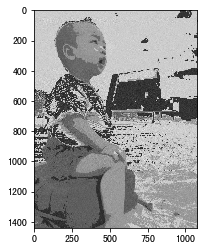

In [148]:
get_image_feature(s1,get_k(0.5))